In [39]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(tf.__version__)

2.12.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Evaluate on the seperately given test data

In [3]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("100")')

!unzip "/content/drive/MyDrive/EE468 Project/test_images.zip" -d "/content/"

Archive:  /content/drive/MyDrive/EE468 Project/test_images.zip
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (14).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (11).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (2).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (5).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (1).JPG  
  inflating: /content/test_images/Potato___healthy/image (2).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (15).JPG  
  inflating: /content/test_images/Apple___Cedar_apple_rust/image (12).JPG  
  inflating: /content/test_images/Potato___healthy/image (7).JPG  
  inflating: /content/test_images/Potato___healthy/image (10).JPG  
  inflating: /content/test_images/Potato___healthy/image (6).JPG  
  inflating: /content/test_images/Apple___Black_rot/image (17).JPG  
  inflating: /content/test_images/Apple___Black_rot/image (34).JPG  
 

In [15]:
# Define the train, validation, and test base directories
test_dir = '/content/test_images/'

In [16]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0,)

In [17]:
test_gen = test_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            class_mode='categorical',
                                            target_size=(256, 256))


Found 3352 images belonging to 39 classes.


In [18]:
# Model path
model_path = "/content/drive/MyDrive/EE468 Project/model/hakan_test/trained_models/inception_v3_mixed7.h5"

# Load the model
model = tf.keras.models.load_model(model_path)

# Evaluate on the test data
loss, accuracy = model.evaluate(test_gen)

105/105 [==============================] - 14s 121ms/step - loss: 0.0881 - accuracy: 0.9782


In [20]:
# Print the loss and accuracy
print(f'Test data performance:')
print(f'\tloss: {loss}\taccuracy: {accuracy}')

Test data performance:
	loss: 0.08805416524410248	accuracy: 0.9782219529151917


# Results and Graphs

In [68]:
# Define the log file path
path = "/content/drive/MyDrive/EE468 Project/model/hakan_test/logs.csv"

# load the logs
logs = pd.read_csv(path)

# Epoch list
epochs = [3*(x+1) for x in logs.index]

## Individual Plots

Text(0, 0.5, 'Loss')

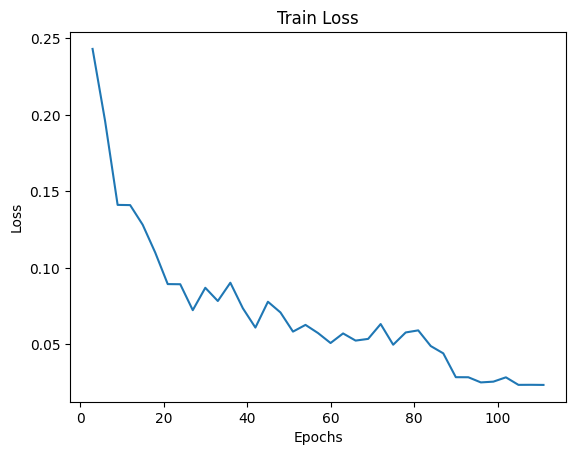

In [69]:
# Plot Train Loss
plt.figure()
plt.plot(epochs, logs["Train Loss"])
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

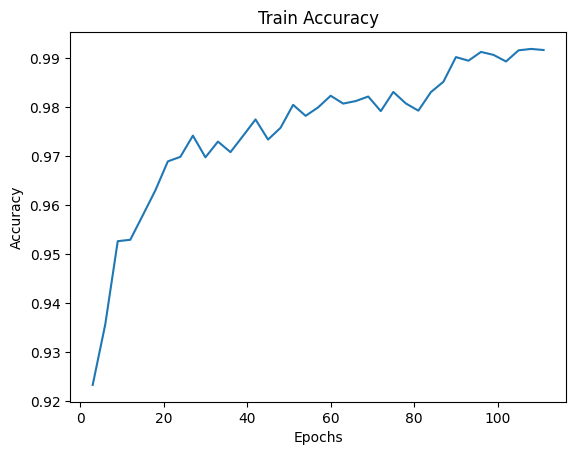

In [70]:
# Plot Train Accuracy
plt.figure()
plt.plot(epochs, logs["Train Accuracy"])
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

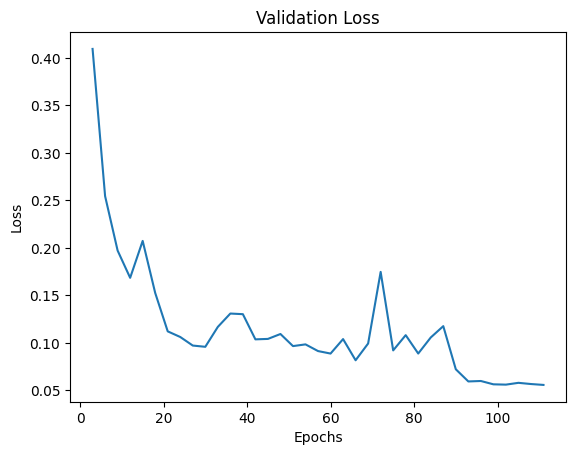

In [71]:
# Plot Validation Loss
plt.figure()
plt.plot(epochs, logs["Validation Loss"])
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

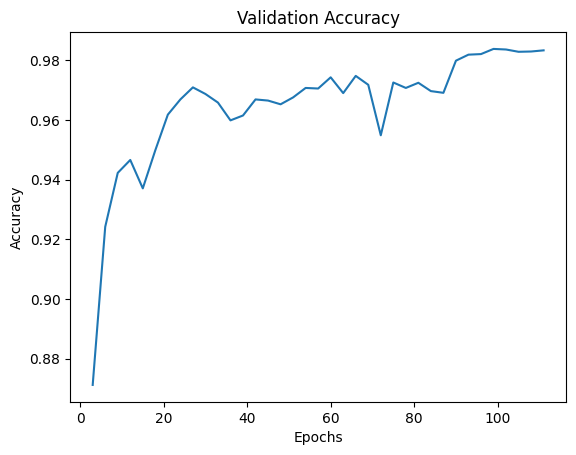

In [72]:
# Plot Validation Accuracy
plt.figure()
plt.plot(epochs, logs["Validation Accuracy"])
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## Comparison

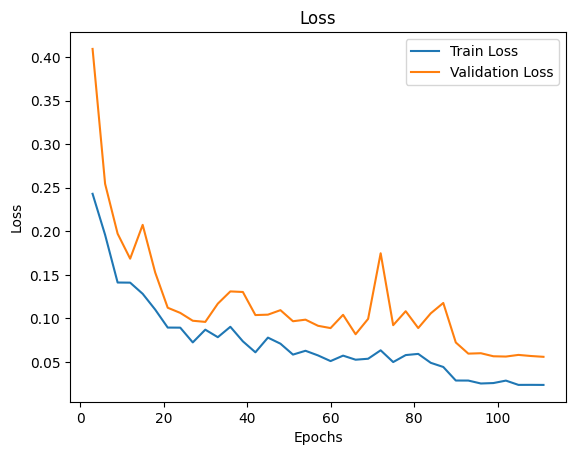

In [73]:
# Plot Train Loss vs Validation Loss
plt.figure()
plt.plot(epochs, logs["Train Loss"])
plt.plot(epochs, logs["Validation Loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(labels=["Train Loss", "Validation Loss"])

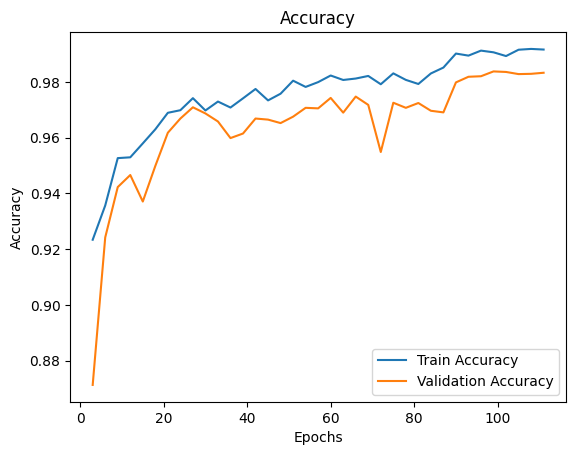

In [75]:
# Plot Train Accuracy vs Validation Accuracy
plt.figure()
plt.plot(epochs, logs["Train Accuracy"])
plt.plot(epochs, logs["Validation Accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(labels=["Train Accuracy", "Validation Accuracy"], loc='lower right')
plt.savefig()